# GFR ESTIMATION EQUATIONS

*   CKDEPI2021
*   4V-MDRD
*   EKFC






In [ ]:
#CKD-EPI 2021 function source https://www.kidney.org/ckd-epi-creatinine-equation-2021-0
def CKD_EPI(Sex, Age, Scr):
  if Sex == 'M':
    k = 0.9
    a=-0.302
    r= Scr/k
    if r<=1:
      eGFR=142*(r**a)*(0.9938**Age)
    elif r>1:
      eGFR=142*(r**(-1.200))*(0.9938**Age)
  elif Sex == 'F':
    k = 0.7
    a=-0.241
    r= Scr/k
    if r<=1:
      eGFR=142*(r**a)*(0.9938**Age)*1.012
    elif r>1:
      eGFR=142*(r**(-1.200))*(0.9938**Age)*1.012
  return round(eGFR, 1)

In [ ]:
#MDRD without race factor function source https://www.niddk.nih.gov/research-funding/research-programs/kidney-clinical-research-epidemiology/laboratory/glomerular-filtration-rate-equations/adults/previous#mdrd
def I4MDRD(Sex, Age, Scr):
 MeGFR=175*(Scr**-1.154)*(Age**-0.203)
 if Sex=='F':
    MeGFR*=0.742
 return round(MeGFR, 1)

In [ ]:
#EKFC function source DOI:10.7326/M20-4366
def EKFC(Sex, Age, Scr):
  #Importing the math module to compute ln and exponential functions
  import math
  #calculating Q for different scenarios of age and sex
  if Age>25 and Sex=='M':
    Q=0.90
    r=Scr/Q
    #further tuning the formula for different age ranges
    if Age<=40:
      #finetuning for different r
      if r<1:
        EeGFr=107.3*(r**(-0.322))
      elif r>=1:
        EeGFr=107.3*(r**-1.132)
    elif Age>40:
      if r<1:
        EeGFr=107.3*(r**-0.322)*0.990**(Age-40)
      elif r>=1:
        EeGFr=107.3*(r**-1.132)*0.990**(Age-40)
  elif Age>25 and Sex=='F':
    Q=0.70
    r=Scr/Q
    if Age<=40:
      #finetuning for different r
      if r<1:
        EeGFr=107.3*(r**(-0.322))
      elif r>=1:
        EeGFr=107.3*(r**-1.132)
    elif Age>40:
      if r<1:
        EeGFr=107.3*(r**-0.322)*0.990**(Age-40)
      elif r>=1:
        EeGFr=107.3*(r**-1.132)*0.990**(Age-40)
  elif Age<=25 and Sex=='M':
    Q=math.exp( 3.200 + 0.259*Age-0.543*math.log(Age) - 0.00763*Age**2 + 0.0000790*Age**3)
    r=Scr/Q
    if r<1:
      EeGFr=107.3*(r**-0.322)
    elif r>=1:
      EeGFr=107.3*(r**-1.132)
  elif Age<=25 and Sex=='F':
    Q=math.exp(3.080 + 0.177*Age-0.223*math.log(Age) - 0.00596*Age**2 + 0.0000686*Age**3)
    r=Scr/Q
    if r<1:
      EeGFr=107.3*(r**-0.322)
    elif r>=1:
      EeGFr=107.3*(r**-1.132)
  return round(EeGFr, 1)



In [ ]:
# calculating random values to check with online calculators
print(f"MDRD= {I4MDRD('M', 60, 1.5)}, CKD-epi= {CKD_EPI('M', 60, 1.5)}, EKFC= {EKFC('M', 60, 1.5)}")
#check success

MDRD= 47.7, CKD-epi= 53.0, EKFC= 49.2


**Importing modules**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyCompare as pyc
import seaborn as sbn
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import numpy as np

# DESCRIPTION OF THE DATA
Source: NHANES/CDC, 2017-2018

In [ ]:
vars1=pd.read_sas('/content/drive/MyDrive/BIOPRO_J.xpt')
vars1=pd.DataFrame(vars1)
col1keep=['SEQN','LBXSCR']
vars1=vars1[col1keep]
vars1.head(2)

,SEQN,LBXSCR
0,93705.0,0.92
1,93706.0,0.81


In [ ]:
vars2=pd.read_sas('/content/drive/MyDrive/DEMO_J20172018.xpt')
vars2=pd.DataFrame(vars2)
vars2.head(2)
col2keep=['SEQN','RIAGENDR','RIDAGEYR']
vars2=vars2[col2keep]
vars2.head(2)

,SEQN,RIAGENDR,RIDAGEYR
0,93703.0,2.0,2.0
1,93704.0,1.0,2.0


In [ ]:
vars=pd.merge(vars2, vars1, on='SEQN')
vars['RIAGENDR']= vars['RIAGENDR'].replace({1:'M', 2:'F'})
vars.dropna(inplace=True)
vars.head(2)

,SEQN,RIAGENDR,RIDAGEYR,LBXSCR
0,93705.0,F,66.0,0.92
1,93706.0,M,18.0,0.81


In [ ]:
vars['egfr_mdrd'] = vars.apply(lambda row: I4MDRD(row['RIAGENDR'], row['RIDAGEYR'], row['LBXSCR']), axis=1)
vars['egfr_CKDEPI21'] = vars.apply(lambda row: CKD_EPI(row['RIAGENDR'], row['RIDAGEYR'], row['LBXSCR']), axis=1)
vars['egfr_EKFC'] = vars.apply(lambda row: EKFC(row['RIAGENDR'], row['RIDAGEYR'], row['LBXSCR']), axis=1)
vars.head()

,SEQN,RIAGENDR,RIDAGEYR,LBXSCR,egfr_mdrd,egfr_CKDEPI21,egfr_EKFC
0,93705.0,F,66.0,0.92,61.1,68.7,60.6
1,93706.0,M,18.0,0.81,124.1,131.1,455.8
2,93707.0,M,13.0,0.64,174.0,145.2,457.7
3,93708.0,F,66.0,0.58,104.0,99.7,87.8
4,93709.0,F,75.0,1.32,39.2,42.1,36.8


In [ ]:
vars = vars[vars["RIDAGEYR"] >= 18]
vars = vars[vars["RIDAGEYR"] <71]
vars=vars.head(200) #taking only 200 data points to avoid overloading the graphs
Desc=vars.describe()
Desc

,SEQN,RIDAGEYR,LBXSCR,egfr_mdrd,egfr_CKDEPI21,egfr_EKFC
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,93891.965000,46.125000,0.941700,88.723000,97.253000,134.38600
std,107.472113,15.367831,0.883613,25.167491,22.337707,126.26509
min,93705.000000,18.000000,0.450000,4.700000,4.900000,5.30000
25%,93797.750000,33.000000,0.707500,72.550000,82.975000,75.95000
50%,93897.000000,47.500000,0.820000,86.400000,100.150000,92.20000
75%,93980.250000,60.000000,0.960000,102.300000,112.800000,108.15000
max,94074.000000,70.000000,11.460000,205.700000,145.100000,507.80000


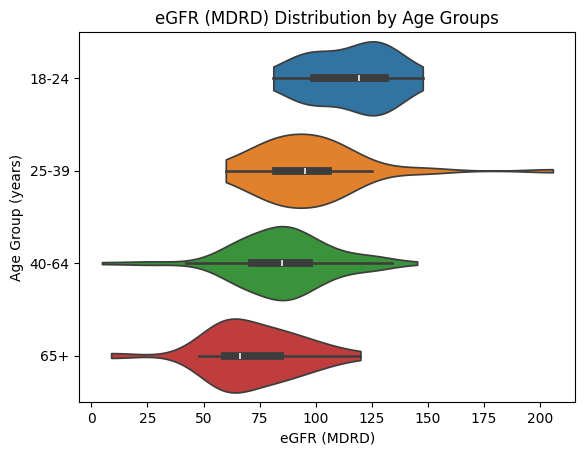

In [ ]:
# Create age bins for better visualization with violin plots
bins = [18, 24, 39, 64, 150]# Define age ranges
labels =["18-24", "25-39", "40-64", "65+"]
len(labels)==len(bins)-1 # Create labels for the bins
vars['age_bins'] = pd.cut(vars['RIDAGEYR'], bins=bins, labels=labels, right=False)
sbn.violinplot(data=vars, y='age_bins', x='egfr_mdrd', hue='age_bins', cut=0, density_norm='count')
plt.title('eGFR (MDRD) Distribution by Age Groups')
plt.ylabel('Age Group (years)')
plt.xlabel('eGFR (MDRD)')
#plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

**MDRD egfr distribution**
* Egfr differs  between age groups with median egfr diminishing with increasing age.
* Overall, egfr values are less than 300 mL/min/m²

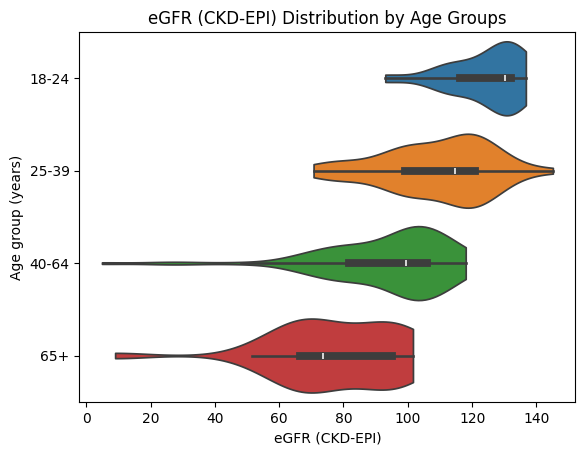

In [ ]:
sbn.violinplot(data=vars, y='age_bins', x='egfr_CKDEPI21', hue='age_bins', density_norm='count', cut=0)
plt.title('eGFR (CKD-EPI) Distribution by Age Groups')
plt.ylabel("Age group (years)")
plt.xlabel("eGFR (CKD-EPI)")
plt.show()

**CKD-EPI egfr distribution**
* Egfr differs greatly between age groups with median egfr diminishing with increasing age.
* Overall, egfr values are less than 200 mL/min/m²

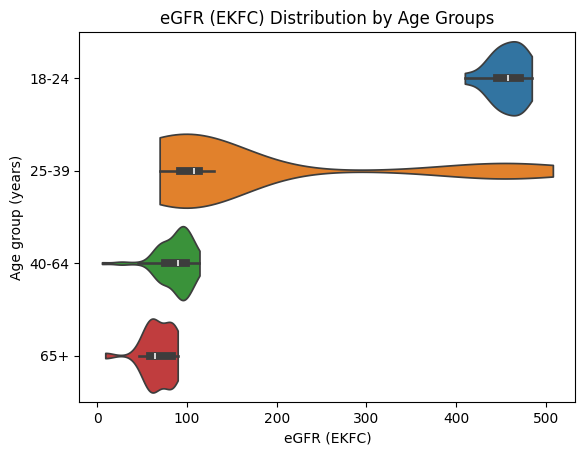

In [ ]:
sbn.violinplot(data=vars, x='egfr_EKFC', y='age_bins', hue='age_bins', density_norm='count', cut=0)
plt.title('eGFR (EKFC) Distribution by Age Groups')
plt.ylabel("Age group (years)")
plt.xlabel("eGFR (EKFC)")
plt.show()

**EKFC egfr distribution**
* Egfr differs between age groups with median egfr diminishing with increasing age.
* Overall, egfr values are exceeds 300 mL/min/m² in contrast to previous equations

# SIMPLE BLAND ALTMAN ANALYSIS

*   Checking for heteroscedasticity (values not homogenously **scattered around mean**)
*   Chekcing for proportional bias (clear **linear trend** in data)



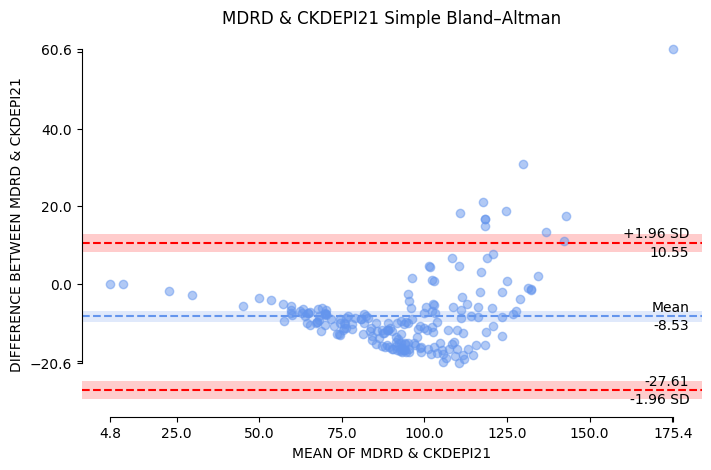

In [ ]:
fig, ax = plt.subplots(figsize=(8,5)) #choose fibonnaci suite number to obtain golden ratio and flex!!!
pyc.blandAltman(
    vars['egfr_mdrd'],
    vars['egfr_CKDEPI21'],
    title='MDRD & CKDEPI21 Simple Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    ax=ax
    )
ax.set_ylabel('DIFFERENCE BETWEEN MDRD & CKDEPI21')
ax.set_xlabel('MEAN OF MDRD & CKDEPI21')
plt.show()

**TAKE ON MDRD & CKDEPI21 Simple Bland–Altman**

*   Values not being homogeneously scattered across the mean violates the homoscedasticiy assumption of Bland altman. *This sugggests multiplicative bias and justifies a plot with percent difference*.

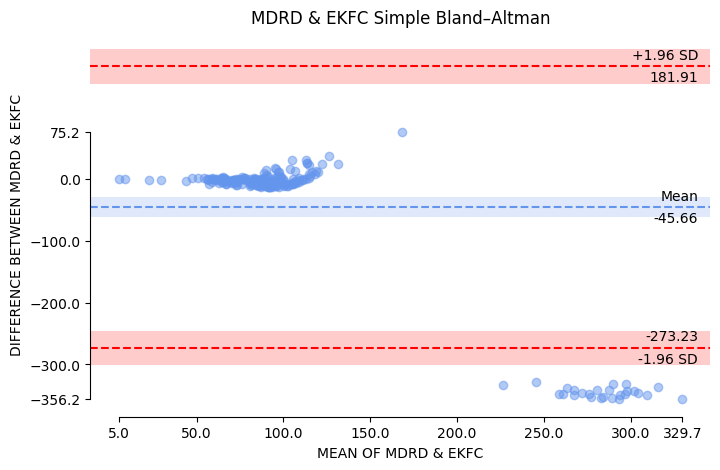

In [ ]:
plt.close('all') #avoid conflict with previous plot
fig, ax = plt.subplots(figsize=(8,5))
pyc.blandAltman(
    vars['egfr_mdrd'],
    vars['egfr_EKFC'],
    title='MDRD & EKFC Simple Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    ax=ax
    )
ax.set_ylabel('DIFFERENCE BETWEEN MDRD & EKFC')
ax.set_xlabel('MEAN OF MDRD & EKFC')
plt.show()

**TAKE ON MDRD & EKFC Simple Bland–Altman**

*   Values not being homogeneously scattered across the mean violates the homoscedasticiy assumption of Bland altman. *This sugggests multiplicative bias and justifies a plot with percent difference*

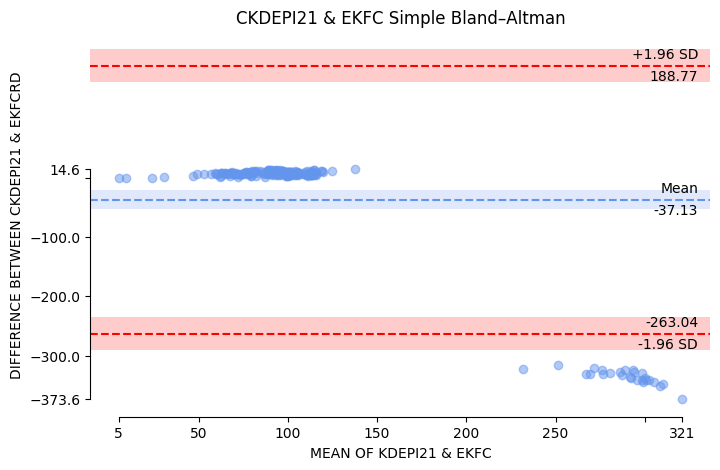

In [ ]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
pyc.blandAltman(
    vars['egfr_CKDEPI21'],
    vars['egfr_EKFC'],
    title='CKDEPI21 & EKFC Simple Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    ax=ax)
ax.set_ylabel('DIFFERENCE BETWEEN CKDEPI21 & EKFCRD')
ax.set_xlabel('MEAN OF KDEPI21 & EKFC')
plt.show()

**TAKE ON CKDEPI21 & EKFC Simple Bland–Altman**

*   Values not being homogeneously scattered across the mean violates the homoscedasticiy assumption of Bland altman. *This justifies a plot with percent difference*.

# PERCENT DIFFERENCE BLAND ALTMAN

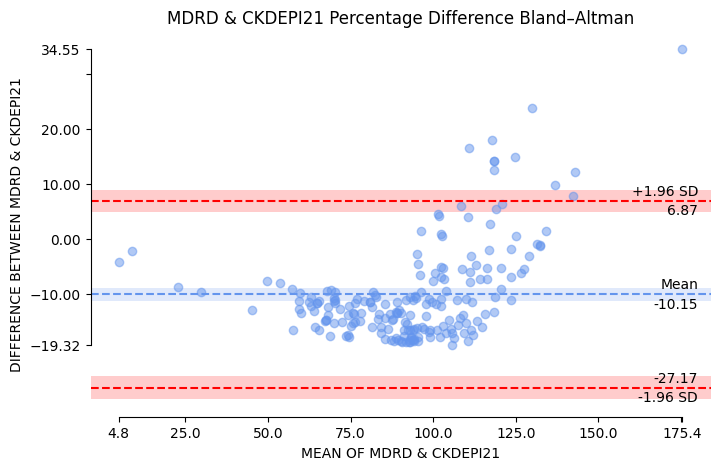

In [ ]:
#bland altman with percent difference
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
pyc.blandAltman(
    vars['egfr_mdrd'],
    vars['egfr_CKDEPI21'],
    title='MDRD & CKDEPI21 Percentage Difference Bland–Altman',
    loaColour='red',
    percentage=True,
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    ax=ax
    )
ax.set_ylabel('DIFFERENCE BETWEEN MDRD & CKDEPI21')
ax.set_xlabel('MEAN OF MDRD & CKDEPI21')
plt.show()

**TAKE ON MDRD & CKDEPI21 Percentage Difference Bland–Altman**

*   There seems to be greater disagreement in high egfrs from 100. Mean percent difference being negative means that **MDRD generally underestimates gfr compared to CKDEPI**.  *This suggests startified analysis egfrs*. In fact, it is true that most of these equations have been created to deal with low or pathological egfr.

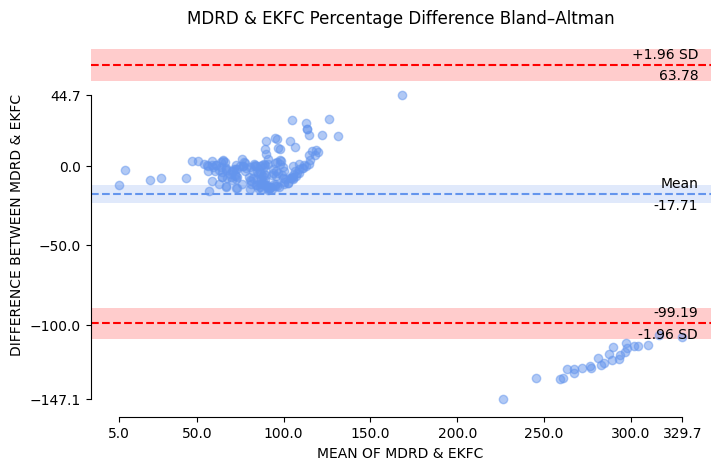

In [ ]:
#bland altman with percent difference
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
pyc.blandAltman(
    vars['egfr_mdrd'],
    vars['egfr_EKFC'],
    title='MDRD & EKFC Percentage Difference Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    percentage=True,
    confidenceInterval=95,
    ax=ax
    )
ax.set_ylabel('DIFFERENCE BETWEEN MDRD & EKFC')
ax.set_xlabel('MEAN OF MDRD & EKFC')
plt.show()

**TAKE ON MDRD & EKFC Percentage Difference Bland–Altman**

*   Disagreement increases a lot from mean egfr of 100. Mean difference being negative means that **MDRD tends to underestimate gfr compared to EKFC**. *A bland altman analysis at low egfr can be interesting.*

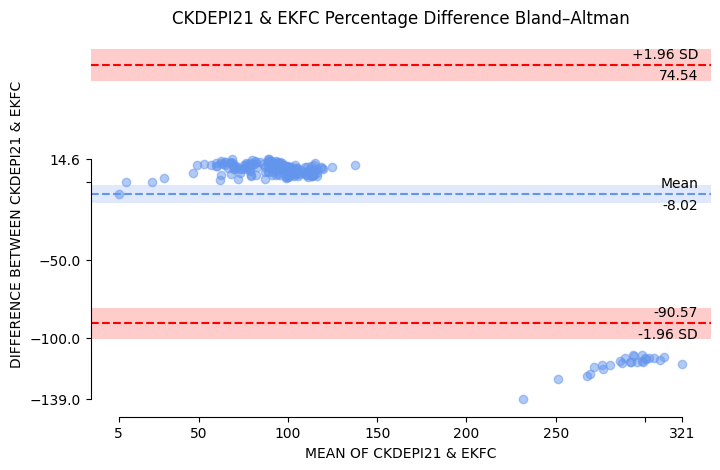

In [ ]:
#bland altman with percent difference
plt.close('all')
fig, ax = plt.subplots(figsize=(8,5))
pyc.blandAltman(
    vars['egfr_CKDEPI21'],
    vars['egfr_EKFC'],
    title='CKDEPI21 & EKFC Percentage Difference Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    percentage=True,
    confidenceInterval=95,
    ax=ax)
ax.set_ylabel('DIFFERENCE BETWEEN CKDEPI21 & EKFC')
ax.set_xlabel('MEAN OF CKDEPI21 & EKFC')
plt.show()

**TAKE ON CKDEPI & EKFC Percentage Difference Bland–Altman**

*   There is no substantial difference between the percent BA and the simple BA. Differences are still compact at low egfr and vary wildly at high egfr. It will be interesting to analyze at low egfr then.

# PERCENT DIFFERENCE BLAND ALTMAN ON LOW EGFR

In [ ]:
Lowegfr=vars[vars["egfr_CKDEPI21"] <=90] #because all egfr equations in this study underestimate gfr compared to CKDEPI, we take the values where CKDEPI is inferior to the 90
Lowegfr.shape #checking if the number of data points is close to the recommendation of Bland altman

(62, 8)

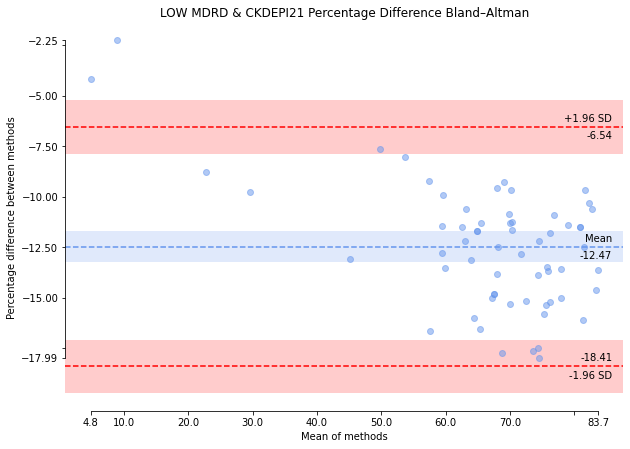

In [ ]:
pyc.blandAltman(
    Lowegfr['egfr_mdrd'],
    Lowegfr['egfr_CKDEPI21'],
    title='LOW MDRD & CKDEPI21 Percentage Difference Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    percentage= True,
    )

plt.show()

**TAKE ON LOW MDRD & CKDEPI21 Percentage Difference BLAND-ALTMAN**


*   Mean percent bias is -12.47% and can be as high as -6.54 or as low as -18.41 (limits of agreement).
*   MDRD underestimates CKDEPI21 at low egfr.




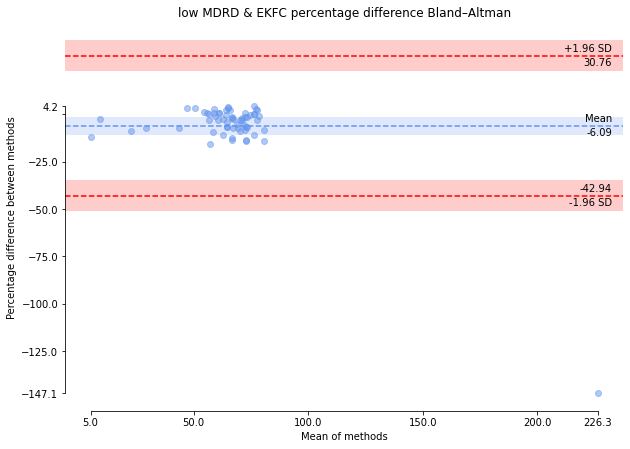

In [ ]:
pyc.blandAltman(
    Lowegfr['egfr_mdrd'],
    Lowegfr['egfr_EKFC'],
    title='low MDRD & EKFC percentage difference Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    percentage=True
        )
plt.show()

**TAKE ON LOW MDRD & EKFC Percent Difference Bland-Altman**

*   Mean percent bias is -6.09% and can be as high as -30.76 or as low as -42.94 with wide confidence intervals(limits of agreement).
*   MDRD underestimates EKFC at low egfr.






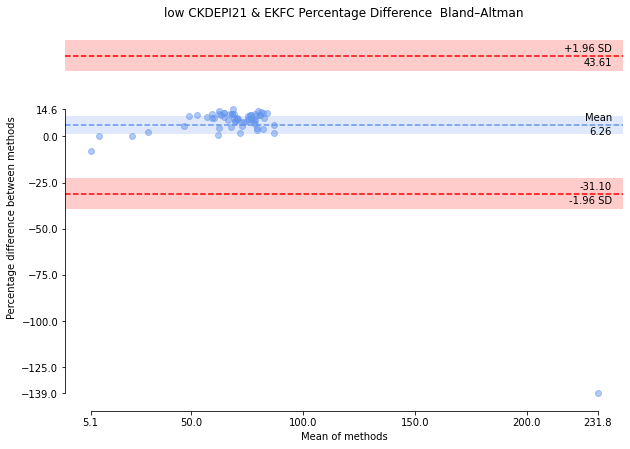

In [ ]:
pyc.blandAltman(
    Lowegfr['egfr_CKDEPI21'],
    Lowegfr['egfr_EKFC'],
    title='low CKDEPI21 & EKFC Percentage Difference  Bland–Altman',
    loaColour='red',
    confidenceIntervalMethod='approximate',
    confidenceInterval=95,
    percentage=True
    )
plt.show()

**TAKE ON LOW CKDEPI21 & EKFC Percent Difference Bland-Altman**

*   Mean percent bias is 6.26%  (narrow confidence interval) and can be as high as 43.61 or as low as -31.10 with wide confidence intervals(for imits of agreement).
*   CKDEPI overestimates EKFC at low egfr.




